In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

base_dir = r'C:\Users\Vítor\Documents\TCC\Banco de Dados\BD_Sem_Pretos\Coronal\BD'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

Using TensorFlow backend.


In [3]:
from keras import layers
from keras import models
#Criando a CNN
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       590080    
__________

In [5]:
from keras import optimizers
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler

# SGD (Descida do Gradiente Estocástico) - Otimizador 
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Todas as imagens em nova scale
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,  
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,  
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        # Todas as images para novo tamanho de 150x150
        target_size=(150, 150),
        batch_size=20,
        # Como foi usado a perda binary_crossentropy, precisamos de rótulos binários
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 25599 images belonging to 2 classes.
Found 9646 images belonging to 2 classes.


In [7]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 85s 850ms/step - loss: 0.6926 - acc: 0.5225 - val_loss: 0.6885 - val_acc: 0.6550
Epoch 2/30
100/100 [==============================] - 61s 615ms/step - loss: 0.6879 - acc: 0.5520 - val_loss: 0.6557 - val_acc: 0.6410
Epoch 3/30
100/100 [==============================] - 68s 685ms/step - loss: 0.6883 - acc: 0.5550 - val_loss: 0.6550 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 59s 594ms/step - loss: 0.6872 - acc: 0.5575 - val_loss: 0.6705 - val_acc: 0.6440
Epoch 5/30
100/100 [==============================] - 58s 584ms/step - loss: 0.6869 - acc: 0.5560 - val_loss: 0.6682 - val_acc: 0.6470
Epoch 6/30
100/100 [==============================] - 58s 585ms/step - loss: 0.6899 - acc: 0.5420 - val_loss: 0.6781 - val_acc: 0.6220
Epoch 7/30
100/100 [==============================] - 58s 581ms/step - loss: 0.6862 - acc: 0.5595 - val_loss: 0.6557 - val_acc: 0.6650
Epoch 8/30
100/100 [==============================] - 5

A acurácia da validação é de: 0.6610000002384185
A perda da validação é de: 0.6622497379779816


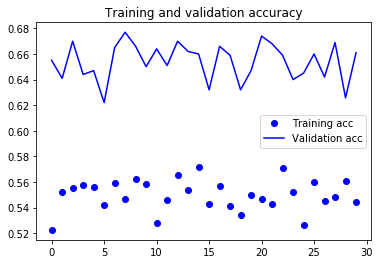

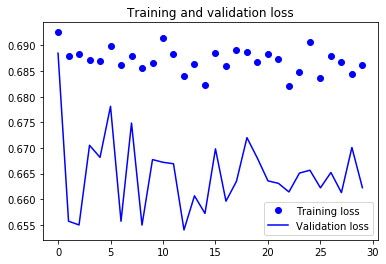

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('A acurácia da validação é de:', val_acc[29])
print('A perda da validação é de:', val_loss[29])
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict_generator(validation_generator,len(validation_generator))
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
confusion_mtx = confusion_matrix(validation_generator.classes, Y_pred_classes) 

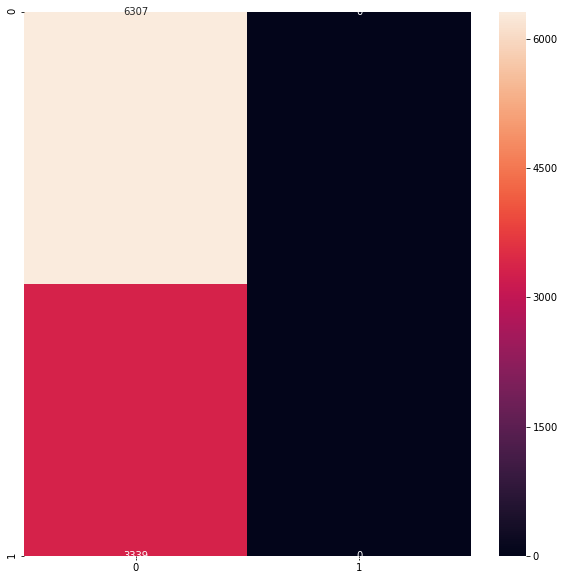

In [44]:
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(confusion_mtx, annot=True, fmt="d");

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
Y_prediction

array([[0.44758716],
       [0.4589656 ],
       [0.46166444],
       [0.46463427],
       [0.4675066 ],
       [0.4542881 ],
       [0.43902433],
       [0.43090424],
       [0.4408997 ],
       [0.44461003],
       [0.4796052 ],
       [0.46158817],
       [0.41943547],
       [0.44390026],
       [0.44609824],
       [0.45232207],
       [0.43646735],
       [0.45685673],
       [0.44955766],
       [0.42569512],
       [0.4488907 ],
       [0.43470898],
       [0.4192904 ],
       [0.3972869 ],
       [0.45017418],
       [0.4379974 ],
       [0.43686038],
       [0.43058768],
       [0.43145794],
       [0.44638795],
       [0.46022582],
       [0.43669593],
       [0.44605765],
       [0.41748837],
       [0.42619893],
       [0.4434164 ],
       [0.45085567],
       [0.44058186],
       [0.4424222 ],
       [0.44813916],
       [0.40899804],
       [0.40126854],
       [0.42155397],
       [0.41678652],
       [0.41550013],
       [0.4615143 ],
       [0.4230595 ],
       [0.471